Machine Learning Lab 3
======
### Альромхин Джорж, гр.858301

#### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io

In [2]:
data = scipy.io.loadmat('../Data/lab3/ex3data1.mat')
x = np.array(data['X'])
y = np.squeeze(data['y'])
X = np.insert(x, 0, 1, axis=1)

#### Plot the x and y axes of the training sample.

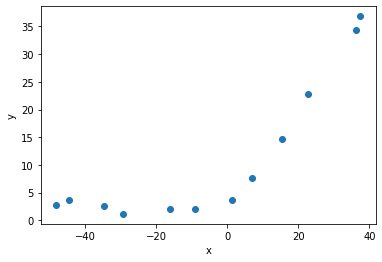

In [3]:
plt.figure()
plt.scatter(x.flatten(), y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Implement the loss cost function for linear regression with L2 regularization.

In [4]:
def compute_cost_reg(X, y, theta, l = 1):
    m = y.shape[0]
    h = X.dot(theta)
    loss = h - y
    cost = np.sum(loss ** 2) / (2 * m) + (l / (2*m)) * np.sum(np.square(theta))
    return cost, loss

In [5]:
initial_theta = np.zeros(X.shape[1])
compute_cost_reg(X, y, initial_theta)

(140.95412088055392,
 array([ -2.13431051,  -1.17325668, -34.35910918, -36.83795516,
         -2.80896507,  -2.12107248, -14.71026831,  -2.61418439,
         -3.74017167,  -3.73169131,  -7.62765885, -22.7524283 ]))

#### Implement the gradient descent function for linear regression with L2 regularization.

In [7]:
def gradient_descent_reg(X, y, theta, l, alpha, num_iters):
    m = y.shape[0]  # Size of training set
    j_history = []
    XT = X.T
    for i in range(0, num_iters):
        cost, loss = compute_cost_reg(X, y, theta, l)
        gradient = (XT.dot(loss) + l * theta) / m
        theta -= alpha * gradient
        j_history.append(cost)

    return theta, j_history

In [16]:
initial_theta = np.zeros(X.shape[1])
theta, costs = gradient_descent_reg(X, y, initial_theta, l=1, alpha=0.0022, num_iters=1000)
print(f'GradDesc cost = {costs[-1]} and theta:\n{theta}')

GradDesc cost = 29.695375543493455 and theta:
[10.86601315  0.35442522]


#### Construct a linear regression model with a regularization coefficient of 0 and plot the resulting function together with the graph from point 2. Why regularization in this case will not work?


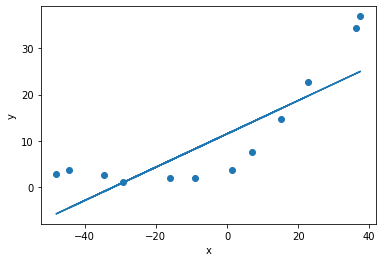

In [8]:
initial_theta = np.zeros(X.shape[1])
theta, _ = gradient_descent_reg(X, y, initial_theta, l=0, alpha=0.0022, num_iters=1000)
h = X.dot(theta)
plt.figure()
plt.scatter(x.flatten(), y, label='Dataset')
plt.plot(x.flatten(), h, label='H')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Regularization does not work because, at the coefficient l = 0, no changes are made to the original loss cost function and gradient descent, this follows from the calculations, additional regularization parameters turn to zero.


#### Plot the learning curves for the training and validation sample. The abscissa axis plots the number of elements from the training sample, and the ordinate axis plots the error (loss function value) for the training sample (first curve) and the validation sample (second curve). What conclusion can be drawn from the constructed schedule?


In [9]:
def train(x_train, x_val, y_train, y_val):
    X = np.insert(x_train, 0, 1, axis=1)
    initial_theta = np.zeros(X.shape[1])
    theta, train_costs = gradient_descent_reg(X, y_train, initial_theta, l=0, alpha=0.0005, num_iters=1000)
    X_val = np.insert(x_val, 0, 1, axis=1)
    val_cost = compute_cost_reg(X_val, y_val, theta, l=0)
    return train_costs[-1], val_cost[0]


def plot_learning_curves(x_train, x_val, y_train, y_val):
    m, n = x_train.shape
    train_costs = []
    val_costs = []
    for size in range(4 , m):
        inds = range(0, size)
        t, v = train(x_train[inds, :], x_val[inds, :], y_train[inds], y_val[inds])
        train_costs.append(t)
        val_costs.append(v)

    plt.figure()
    plt.plot(train_costs, 'b')
    plt.plot(val_costs, 'r')
    plt.show()

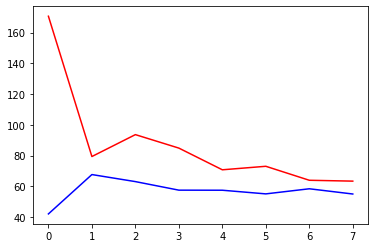

In [10]:
x_val = data['Xval']
y_val = np.squeeze(data['yval'])
plot_learning_curves(x, x_val, y, y_val)

with the growth of the sample size, the loss graphs on the training set and validation approach each other, i.e. the larger the size of the training sample the more accurate the training result.


#### Implement the function of adding P-1 new features to the training sample (X2, X3, X4,..., XP).


In [11]:
def map_feature(x, p):
    out = x
    
    for i in range(2, p + 1):
        r = x ** i
        out = np.append(out, r, axis=1)

    return out

#### Since the polynomial of high degree will be used in this problem, it is necessary to normalize the features before training.


In [23]:
def feature_normalization(X):
    norm = (X - X.mean(axis=0)) / X.std(axis=0)
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    return norm, mu, sigma

#### Train a model with a regularization coefficient of 0 and p = 8.


X = map_feature(x, 8)
X_norm, mu, sigma = feature_normalization(X)
X_norm = np.insert(X_norm, 0, 1, axis=1)

In [103]:
initial_theta = np.zeros(X_norm.shape[1])
theta, costs = gradient_descent_reg(X_norm, y, initial_theta, l=0, alpha=0.3, num_iters=1000)

#### Build a graph of the model combined with the training sample, as well as a graph of the learning process. What conclusion can be drawn in this case?


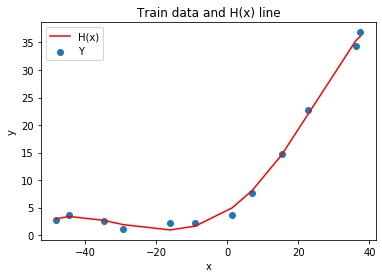

In [84]:
h = X_norm.dot(theta)
new_x, new_h = zip(*sorted(zip(x.flatten(), h)))
plt.figure()
plt.scatter(x.flatten(), y)
plt.plot(new_x, new_h, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data and H(x) line')
plt.legend(['H(x)', 'Y'])
plt.show()

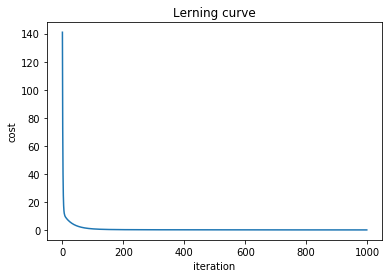

In [85]:
plt.figure()
plt.plot(costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Lerning curve')
plt.show()

with an increased number of input features, we obtained a polynomial function as close as possible to the original data, the training schedule shows that the gradient descent function converges quite quickly.


#### Construct graphs from point 10 for models with regularization coefficients 1 and 100. What conclusions can be drawn?


In [96]:
initial_theta = np.zeros(X_norm.shape[1])
theta1, costs1 = gradient_descent_reg(X_norm, y, initial_theta, l=1, alpha=0.1, num_iters=400)

In [97]:
initial_theta = np.zeros(X_norm.shape[1])
theta2, costs2 = gradient_descent_reg(X_norm, y, initial_theta, l=100, alpha=0.1, num_iters=400)

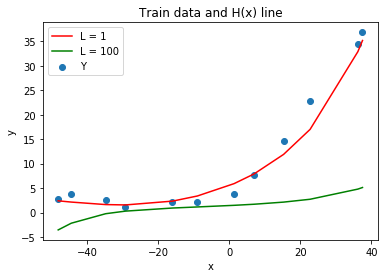

In [98]:
h1 = X_norm.dot(theta1)
new_x1, new_h1 = zip(*sorted(zip(x.flatten(), h1)))
h2 = X_norm.dot(theta2)
new_x2, new_h2 = zip(*sorted(zip(x.flatten(), h2)))
plt.figure()
plt.scatter(x.flatten(), y)
plt.plot(new_x1, new_h1, 'r-')
plt.plot(new_x2, new_h2, 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Train data and H(x) line')
plt.legend(['L = 1', 'L = 100', 'Y'])
plt.show()

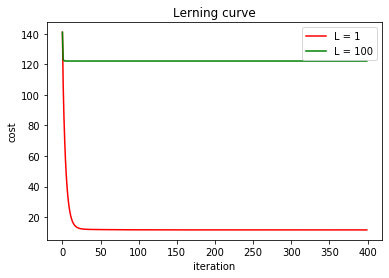

In [99]:
plt.figure()
plt.plot(costs1, 'r-')
plt.plot(costs2, 'g-')
plt.legend(['L = 1', 'L = 100'])
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Lerning curve')
plt.show()

lambda values during regularization help to avoid over-training, and very large lambda values lead to under-learning of the model.


####  Using validation sampling, select the regularization coefficient that allows you to achieve the lowest error. Process selection reflect with the help graphics (graphs).

In [100]:
def find_l(x_train, x_val, y_train, y_val):
    X_train = map_feature(x_train, 8)
    X_train, _, _ = feature_normalization(X_train)
    X_train = np.insert(X_train, 0, 1, axis=1)
    X_val = map_feature(x_val, 8)
    X_val, _, _ = feature_normalization(X_val)
    X_val = np.insert(X_val, 0, 1, axis=1)
    l_vals = np.linspace(0, 4, 50)
    l_costs = np.empty(shape=(0))
    for l in l_vals:
        initial_theta = np.zeros(X_train.shape[1])
        theta, costs = gradient_descent_reg(X_train, y_train, initial_theta, l=l, alpha=0.2, num_iters=1000)
        c = compute_cost_reg(X_val, y_val, theta, l=0)
        l_costs = np.append(l_costs, c[0])

    plt.figure()
    plt.plot(l_vals, l_costs)
    plt.xlabel('Lambda')
    plt.ylabel('Cost')
    plt.show()

    ind = l_costs.argmin()
    return l_vals[ind]

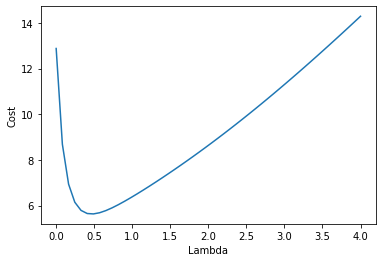

Best fitting lambda for validation set is 0.4897959183673469


In [101]:
lb = find_l(x, x_val, y, y_val)
print(f'Best fitting lambda for validation set is {lb}')

#### Calculate the error (loss) on the control sample.


In [105]:
x_test = np.array(data['Xtest'])
y_test = np.squeeze(data['ytest'])
X_test = map_feature(x_test, 8)
X_test, _, _ = feature_normalization(X_test)
X_test = np.insert(X_test, 0, 1, axis=1)
X_train = map_feature(x, 8)
X_train, _, _ = feature_normalization(X_train)
X_train = np.insert(X_train, 0, 1, axis=1)

In [108]:
initial_theta = np.zeros(X_train.shape[1])
theta, _ = gradient_descent_reg(X_train, y, initial_theta, l=lb, alpha=0.3, num_iters=1000)
test_cost = compute_cost_reg(X_test, y_test, theta, l=lb)
print(f'Cost on test set: {test_cost[0]}')

Cost on test set: 11.585832169340772
